In [3]:
import pandas as pd
import numpy as np
from math import log2

In [127]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)


In [128]:
dataSet.columns=dataSet.iloc[0]
dataSet=dataSet[1:].reset_index(drop=True)
dataSet

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95,360,3.5
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3
497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [39]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [40]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [41]:
[~dataSet.columns.isin(["Age of Borrower"])]

[array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True])]

In [42]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [43]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [44]:
newDataSet[:5]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


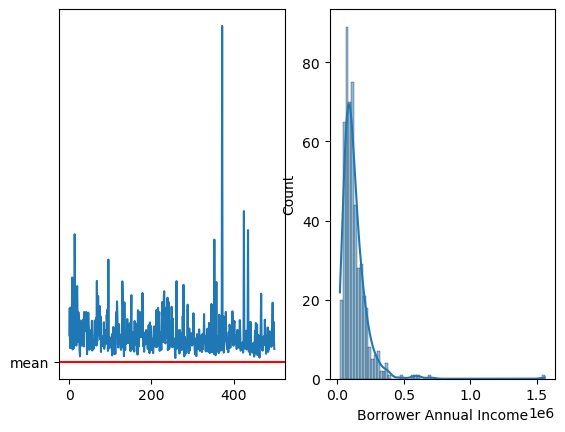

In [47]:
import matplotlib.pyplot as myplot
import seaborn as sns
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= 'mean', color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

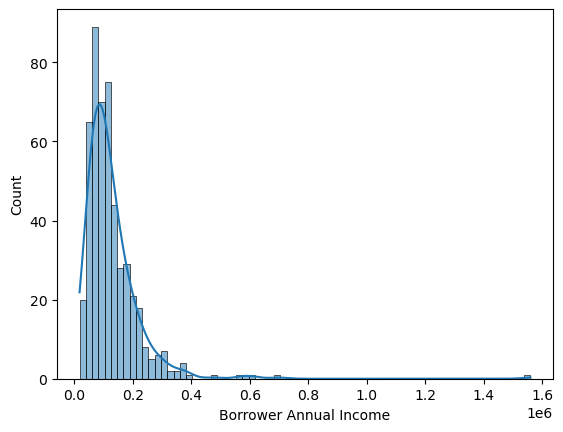

In [48]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [49]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
372,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [50]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

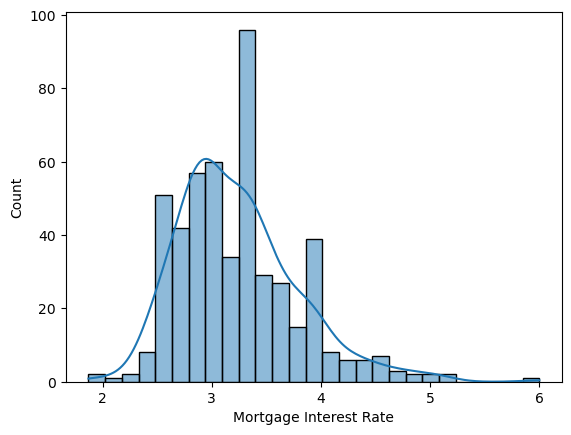

In [51]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

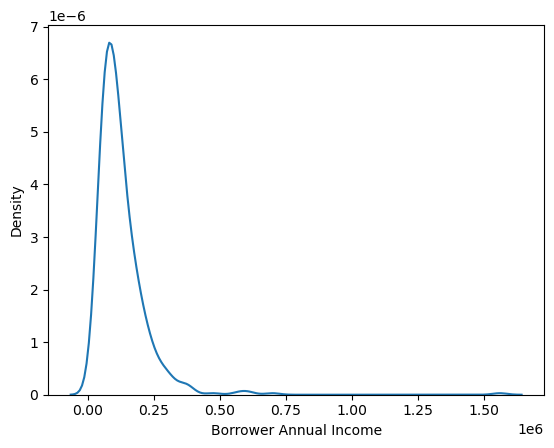

In [52]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [53]:
newDataSet[5:20]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
7,8,53,39.06,74600,392000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
8,9,36,98.09,96500,58000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
9,10,48,41.47,80000,170000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
10,11,34,40.18,96500,182000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
12,13,6,84.75,127900,88000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
13,14,26,33.01,79700,593000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
14,15,6,34.80,127900,297000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [54]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [55]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [76]:
cat=pd.qcut(dataSet["Borrower Annual Income"],q=4)
print(cat)


0       (105500.0, 155250.0]
1      (155250.0, 1560000.0]
2       (17999.999, 69750.0]
3       (105500.0, 155250.0]
4       (105500.0, 155250.0]
               ...          
495    (155250.0, 1560000.0]
496      (69750.0, 105500.0]
497    (155250.0, 1560000.0]
498     (105500.0, 155250.0]
499     (17999.999, 69750.0]
Name: Borrower Annual Income, Length: 500, dtype: category
Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]]


In [77]:
type(dataSet["Borrower Annual Income"])

pandas.core.series.Series

In [78]:
income_data=pd.concat([newDataSet["Borrower Annual Income"], cat], axis=1)
income_data.columns=["Income", "Category"]
income_data

,Income,Category
0,123000,"(105500.0, 155250.0]"
1,250000,"(155250.0, 1560000.0]"
2,64000,"(17999.999, 69750.0]"
3,141000,"(105500.0, 155250.0]"
4,109000,"(105500.0, 155250.0]"
...,...,...
495,275000,"(155250.0, 1560000.0]"
496,79000,"(69750.0, 105500.0]"
497,187000,"(155250.0, 1560000.0]"
498,109000,"(105500.0, 155250.0]"


In [79]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')])

In [82]:
keys=grouped.groups.keys()
keys=list(keys)
print("list of keys", keys)
import numpy as np
keys=np.array(keys)
print('arrays', keys)
keys=keysArray.reshape((2,2))
keys

list of keys [Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')]
arrays [Interval(17999.999, 69750.0, closed='right')
 Interval(69750.0, 105500.0, closed='right')
 Interval(105500.0, 155250.0, closed='right')
 Interval(155250.0, 1560000.0, closed='right')]


array([Interval(17999.999, 69750.0, closed='right'),
       Interval(69750.0, 105500.0, closed='right'),
       Interval(105500.0, 155250.0, closed='right'),
       Interval(155250.0, 1560000.0, closed='right')], dtype=object)

In [83]:
grouped.groups

{(17999.999, 69750.0]: [2, 8, 11, 25, 26, 43, 44, 49, 56, 59, 60, 77, 85, 94, 97, 100, 104, 109, 112, 119, 125, 126, 127, 128, 133, 136, 149, 152, 158, 166, 182, 191, 195, 200, 204, 213, 220, 224, 240, 243, 244, 251, 257, 258, 262, 268, 271, 272, 273, 275, 280, 284, 285, 291, 293, 305, 306, 309, 313, 314, 315, 317, 318, 319, 323, 325, 332, 335, 337, 338, 339, 341, 342, 347, 350, 352, 356, 359, 360, 361, 362, 364, 367, 370, 374, 376, 384, 385, 387, 389, 392, 407, 408, 414, 417, 418, 420, 421, 423, 424, ...], (69750.0, 105500.0]: [12, 17, 21, 28, 30, 32, 34, 35, 50, 53, 57, 58, 66, 68, 80, 81, 83, 88, 90, 96, 99, 102, 103, 106, 118, 122, 123, 135, 138, 143, 144, 146, 160, 161, 162, 165, 168, 169, 180, 183, 186, 190, 198, 201, 205, 209, 210, 217, 221, 223, 229, 233, 234, 245, 246, 248, 253, 255, 256, 259, 260, 263, 264, 266, 282, 283, 286, 287, 289, 294, 296, 298, 299, 300, 301, 310, 320, 326, 327, 329, 330, 331, 333, 351, 355, 377, 382, 383, 393, 399, 400, 403, 404, 411, 412, 419, 422, 4

In [105]:
grouped.get_group(pd.Interval(17999.999, 69750.0, closed='right'))

,Income,Category
2,64000,"(17999.999, 69750.0]"
8,58000,"(17999.999, 69750.0]"
11,64000,"(17999.999, 69750.0]"
25,54000,"(17999.999, 69750.0]"
26,26000,"(17999.999, 69750.0]"
...,...,...
479,38000,"(17999.999, 69750.0]"
484,47000,"(17999.999, 69750.0]"
485,64000,"(17999.999, 69750.0]"
486,62000,"(17999.999, 69750.0]"


In [91]:
keys=keys.reshape((2,2))
print(keys)

[[Interval(17999.999, 69750.0, closed='right')
  Interval(69750.0, 105500.0, closed='right')]
 [Interval(105500.0, 155250.0, closed='right')
  Interval(155250.0, 1560000.0, closed='right')]]


THe axes object has [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
outer array is  0
THe index of inner array is  0
THe index of inner array is  1
outer array is  1
THe index of inner array is  0
THe index of inner array is  1


/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()


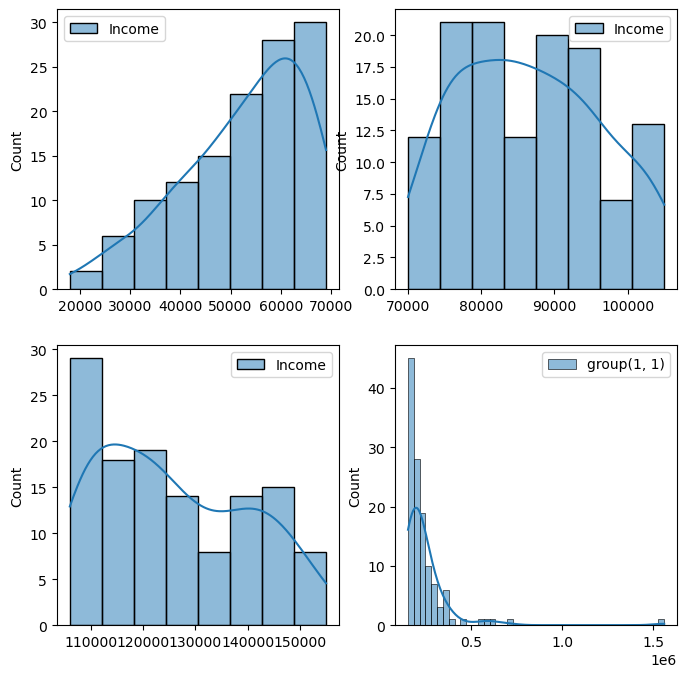

In [92]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [93]:
first_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', first_group.min(), 'the max is ', first_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


the min of 1st group is Income                     18000
Category    (17999.999, 69750.0]
dtype: object the max is  Income                     69000
Category    (17999.999, 69750.0]
dtype: object 

the min of 1st group is Income                    70000
Category    (69750.0, 105500.0]
dtype: object the max is  Income                   105000
Category    (69750.0, 105500.0]
dtype: object 

the min of 1st group is Income                    106000
Category    (105500.0, 155250.0]
dtype: object the max is  Income                    155000
Category    (105500.0, 155250.0]
dtype: object 

the min of 1st group is Income                     156000
Category    (155250.0, 1560000.0]
dtype: object the max is  Income                    1560000
Category    (155250.0, 1560000.0]
dtype: object 



In [95]:
import math
#math.sqrt(first_group.var())

In [96]:
pd.DataFrame(first_group).info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 2 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Income    125 non-null    int64   
 1   Category  125 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.5 KB


In [111]:
first_group
#first_group=first_group.astype(float)

,Income,Category
2,64000,"(17999.999, 69750.0]"
8,58000,"(17999.999, 69750.0]"
11,64000,"(17999.999, 69750.0]"
25,54000,"(17999.999, 69750.0]"
26,26000,"(17999.999, 69750.0]"
...,...,...
479,38000,"(17999.999, 69750.0]"
484,47000,"(17999.999, 69750.0]"
485,64000,"(17999.999, 69750.0]"
486,62000,"(17999.999, 69750.0]"


In [112]:
emperical_stats=first_group.describe()
emperical_stats

,Income
count,125.00000
mean,52624.00000
std,12369.09781
min,18000.00000
25%,45000.00000
50%,55000.00000
75%,62000.00000
max,69000.00000


In [101]:
#fourth_group=fourth_group.astype(float)
#fourth_group.describe()

In [113]:
cv_first_group=first_group["Income"].std()/first_group["Income"].mean() *100
cv_first_group

23.5046705124612

In [ ]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

In [ ]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)

In [ ]:
dataSet[dataSet["Borrower Annual Income"]<80000]

In [ ]:
# 3:- Let the journey Begin 

In [13]:
# let us use the regression model to see the best attributes
dataSet.columns


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

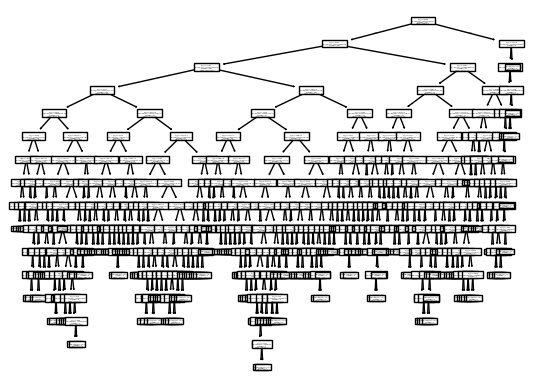

In [134]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income", "Age of Borrower"],axis=1)
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)
plot_tree(model)
myplot.show()



In [138]:
X_train[:2]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
249,250,12,25.71,68300,3.7482,2,20,785000,195000,25.29,120,2.75
433,434,47,25.68,80700,1.0409,2,10,275000,215000,80,360,2.99


In [147]:
from sklearn.tree import export_text
tree_rules= export_text(model, feature_names=X_train.columns)
print(tree_rules)

|--- Borrower Income Ratio <= 5.83
|   |--- Borrower Income Ratio <= 1.83
|   |   |--- Borrower Income Ratio <= 1.06
|   |   |   |--- Borrower Income Ratio <= 0.72
|   |   |   |   |--- Borrower Income Ratio <= 0.58
|   |   |   |   |   |--- Borrower Income Ratio <= 0.47
|   |   |   |   |   |   |--- Amount Borrowed <= 130000.00
|   |   |   |   |   |   |   |--- Mortgage Interest Rate <= 3.37
|   |   |   |   |   |   |   |   |--- Median Family Income in Local Area <= 77200.00
|   |   |   |   |   |   |   |   |   |--- value: [20000.00]
|   |   |   |   |   |   |   |   |--- Median Family Income in Local Area >  77200.00
|   |   |   |   |   |   |   |   |   |--- value: [18000.00]
|   |   |   |   |   |   |   |--- Mortgage Interest Rate >  3.37
|   |   |   |   |   |   |   |   |--- Appraised Value of Home <= 245000.00
|   |   |   |   |   |   |   |   |   |--- value: [26000.00]
|   |   |   |   |   |   |   |   |--- Appraised Value of Home >  245000.00
|   |   |   |   |   |   |   |   |   |--- value: [27

In [146]:
#X_train.groupby("Borrower Income Ratio").groups

In [145]:
X_train

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
249,250,12,25.71,68300,3.7482,2,20,785000,195000,25.29,120,2.75
433,434,47,25.68,80700,1.0409,2,10,275000,215000,80,360,2.99
19,20,6,65.52,75000,4.6933,2,30,755000,505000,68,360,4.12
322,323,22,14.2,62800,1.9904,2,30,365000,285000,79,360,3.25
332,333,36,2.7,71700,0.6834,2,37,155000,135000,95,360,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,19,9.65,80600,1.0174,2,46,295000,235000,80.99,360,2.87
270,271,41,19.44,92100,1.3029,2,30,475000,375000,78.94,180,1.99
348,349,26,10.69,79700,2.0828,2,36,445000,335000,74.6,360,4.87
435,436,27,10.22,95600,6.4017,2,10,175000,75000,45.31,180,3.25


In [172]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    random_state=42
)

print(X_train)
model.fit(X_train, y_train)


0   Borrower Income Ratio LTV Ratio
249                3.7482     25.29
433                1.0409        80
19                 4.6933        68
322                1.9904        79
332                0.6834        95
..                    ...       ...
106                1.0174     80.99
270                1.3029     78.94
348                2.0828      74.6
435                6.4017     45.31
102                0.8846     44.72

[400 rows x 2 columns]


DecisionTreeRegressor(random_state=42)

In [173]:
rules=export_text(model, feature_names=X_train.columns)
print(rules)


|--- Borrower Income Ratio <= 5.83
|   |--- Borrower Income Ratio <= 1.83
|   |   |--- Borrower Income Ratio <= 1.06
|   |   |   |--- Borrower Income Ratio <= 0.72
|   |   |   |   |--- Borrower Income Ratio <= 0.58
|   |   |   |   |   |--- Borrower Income Ratio <= 0.47
|   |   |   |   |   |   |--- Borrower Income Ratio <= 0.36
|   |   |   |   |   |   |   |--- Borrower Income Ratio <= 0.24
|   |   |   |   |   |   |   |   |--- value: [18000.00]
|   |   |   |   |   |   |   |--- Borrower Income Ratio >  0.24
|   |   |   |   |   |   |   |   |--- LTV Ratio <= 44.80
|   |   |   |   |   |   |   |   |   |--- Borrower Income Ratio <= 0.33
|   |   |   |   |   |   |   |   |   |   |--- value: [27000.00]
|   |   |   |   |   |   |   |   |   |--- Borrower Income Ratio >  0.33
|   |   |   |   |   |   |   |   |   |   |--- value: [26000.00]
|   |   |   |   |   |   |   |   |--- LTV Ratio >  44.80
|   |   |   |   |   |   |   |   |   |--- value: [20000.00]
|   |   |   |   |   |   |--- Borrower Income Ratio 

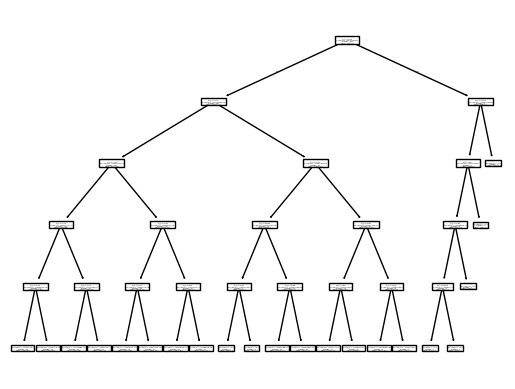

|--- Borrower Income Ratio <= 5.83
|   |--- Borrower Income Ratio <= 1.83
|   |   |--- Borrower Income Ratio <= 1.06
|   |   |   |--- Borrower Income Ratio <= 0.72
|   |   |   |   |--- Borrower Income Ratio <= 0.58
|   |   |   |   |   |--- value: [40344.83]
|   |   |   |   |--- Borrower Income Ratio >  0.58
|   |   |   |   |   |--- value: [59093.02]
|   |   |   |--- Borrower Income Ratio >  0.72
|   |   |   |   |--- Borrower Income Ratio <= 0.91
|   |   |   |   |   |--- value: [72098.04]
|   |   |   |   |--- Borrower Income Ratio >  0.91
|   |   |   |   |   |--- value: [83951.22]
|   |   |--- Borrower Income Ratio >  1.06
|   |   |   |--- Borrower Income Ratio <= 1.49
|   |   |   |   |--- Borrower Income Ratio <= 1.27
|   |   |   |   |   |--- value: [96583.33]
|   |   |   |   |--- Borrower Income Ratio >  1.27
|   |   |   |   |   |--- value: [113829.79]
|   |   |   |--- Borrower Income Ratio >  1.49
|   |   |   |   |--- LTV Ratio <= 83.50
|   |   |   |   |   |--- value: [146807.69]
|  

In [186]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

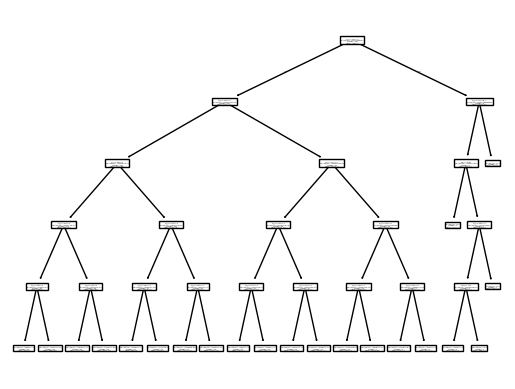

|--- Borrower Annual Income <= 433500.00
|   |--- Borrower Annual Income <= 153500.00
|   |   |--- Borrower Annual Income <= 92500.00
|   |   |   |--- Borrower Annual Income <= 64500.00
|   |   |   |   |--- Borrower Annual Income <= 46500.00
|   |   |   |   |   |--- value: [36480.00]
|   |   |   |   |--- Borrower Annual Income >  46500.00
|   |   |   |   |   |--- value: [55890.91]
|   |   |   |--- Borrower Annual Income >  64500.00
|   |   |   |   |--- Borrower Annual Income <= 78500.00
|   |   |   |   |   |--- value: [71717.39]
|   |   |   |   |--- Borrower Annual Income >  78500.00
|   |   |   |   |   |--- value: [85461.54]
|   |   |--- Borrower Annual Income >  92500.00
|   |   |   |--- Borrower Annual Income <= 121000.00
|   |   |   |   |--- Borrower Annual Income <= 105500.00
|   |   |   |   |   |--- value: [98437.50]
|   |   |   |   |--- Borrower Annual Income >  105500.00
|   |   |   |   |   |--- value: [112425.00]
|   |   |   |--- Borrower Annual Income >  121000.00
|   |   |  

In [194]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Age of Borrower"], axis=1)
y=dataSet["Borrower Annual Income"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)
